Model Word2vec

In [4]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import string
from pyvi import ViTokenizer
from gensim.models import Word2Vec

# path data
pathdata = '/workspaces/NLP_ass1/datatrain.txt'

def read_data(path):
    traindata = []
    sents = open(pathdata, 'r').readlines()
    for sent in sents:
        traindata.append(sent.split())
    return traindata


if __name__ == '__main__':
    train_data = read_data(pathdata)

    model = Word2Vec(train_data, vector_size=150, window=10, min_count=2, workers=4, sg=0)
    model.wv.save("word2vec_skipgram.model")

In [5]:
from gensim.models import KeyedVectors

model = KeyedVectors.load("word2vec_skipgram.model")


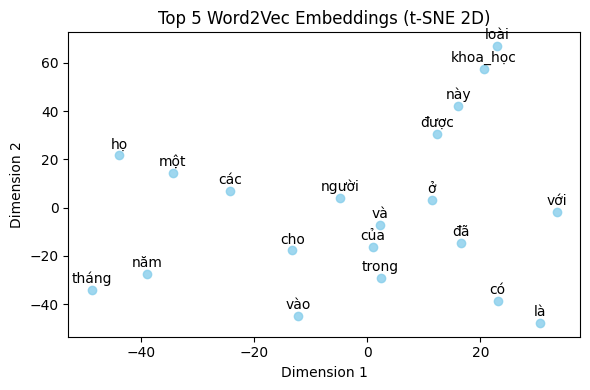

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Kiểm tra loại model
if hasattr(model, 'wv'):
    vectors = model.wv
else:
    vectors = model  # KeyedVectors

# Lấy top 5 từ đầu tiên
words = list(vectors.index_to_key)[:20]
word_vectors = np.array([vectors[w] for w in words])

# Giảm chiều về 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=2, max_iter=1000)
X_2d = tsne.fit_transform(word_vectors)

# Vẽ đồ thị
plt.figure(figsize=(6, 4))
plt.scatter(X_2d[:, 0], X_2d[:, 1], color='skyblue', alpha=0.8)

# Gắn nhãn từ
for i, word in enumerate(words):
    plt.annotate(word, xy=(X_2d[i, 0], X_2d[i, 1]), textcoords='offset points', xytext=(0, 5), ha='center')

plt.title("Top 5 Word2Vec Embeddings (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()


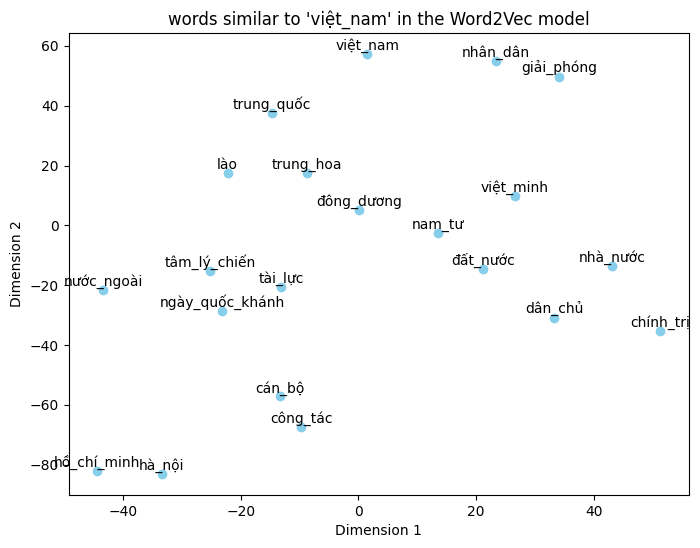

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
def plot_similar_words(model, keyword, topn=10):
    """
    Vẽ cụm các từ gần với 'keyword' trong không gian vector.
    """
    # Lấy danh sách các từ tương tự
    similar_words = model.most_similar(keyword, topn=topn)

    # Tạo danh sách từ gồm từ khóa + các từ tương đồng
    labels = [keyword] + [word for word, _ in similar_words]

    # Lấy vector tương ứng
    vectors = [model[word] for word in labels]

    # Giảm chiều về 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
    reduced = tsne.fit_transform(np.array(vectors))

    # Vẽ scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], color='skyblue')

    for i, label in enumerate(labels):
        plt.annotate(label, xy=(reduced[i, 0], reduced[i, 1]),
                     textcoords='offset points', xytext=(0, 3), ha='center')

    plt.title(f"words similar to 'việt_nam' in the Word2Vec model")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# 🔹 Ví dụ demo: vẽ cụm quanh từ "tình_yêu"
plot_similar_words(model, "việt_nam", topn=20)


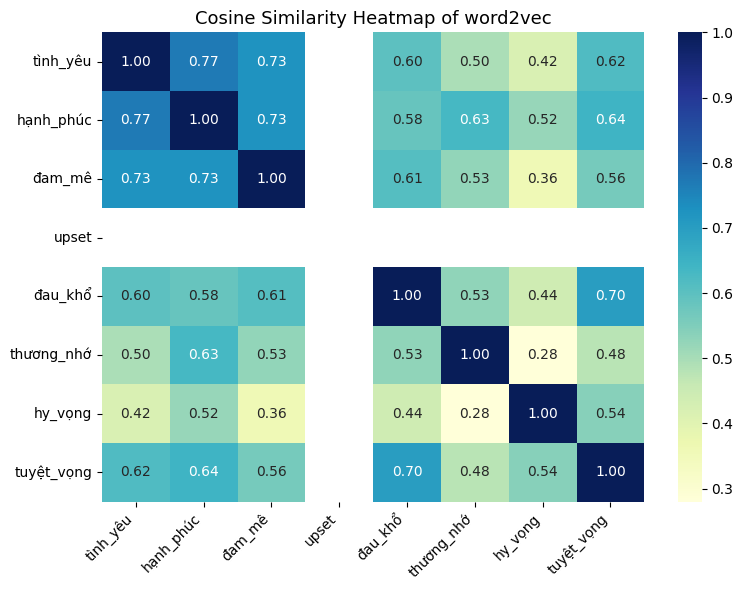

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_similarity_heatmap(model, words):
    """
    Vẽ heatmap biểu diễn độ tương đồng cosine giữa các từ trong danh sách.
    """
    # Tạo ma trận trống
    sim_matrix = np.zeros((len(words), len(words)))

    # Tính độ tương đồng cosine giữa từng cặp từ
    for i, w1 in enumerate(words):
        for j, w2 in enumerate(words):
            try:
                sim_matrix[i][j] = model.similarity(w1, w2)
            except KeyError:
                sim_matrix[i][j] = np.nan  # Nếu từ không có trong vocab

    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(sim_matrix, annot=True, cmap="YlGnBu", xticklabels=words, yticklabels=words, fmt=".2f")
    plt.title("Cosine Similarity Heatmap of word2vec", fontsize=13)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# 🔹 Ví dụ demo với nhóm từ cảm xúc
emotion_words = ["tình_yêu", "hạnh_phúc", "đam_mê", "upset", "đau_khổ", "thương_nhớ", "hy_vọng", "tuyệt_vọng"]

plot_similarity_heatmap(model, emotion_words)


Model Fasttext

In [12]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import string
from pyvi import ViTokenizer
from gensim.models.fasttext import FastText

# path data
pathdata = './datatrain.txt'

def read_data(path):
    traindata = []
    sents = open(pathdata, 'r').readlines()
    for sent in sents:
        traindata.append(sent.split())
    return traindata

if __name__ == '__main__':
    train_data = read_data(pathdata)

    model_fasttext = FastText(vector_size=150, window=10, min_count=2, workers=4, sg=1)
    model_fasttext.build_vocab(train_data)
    model_fasttext.train(train_data, total_examples=model_fasttext.corpus_count, epochs=10)

    model_fasttext.wv.save("fasttext_gensim.model")

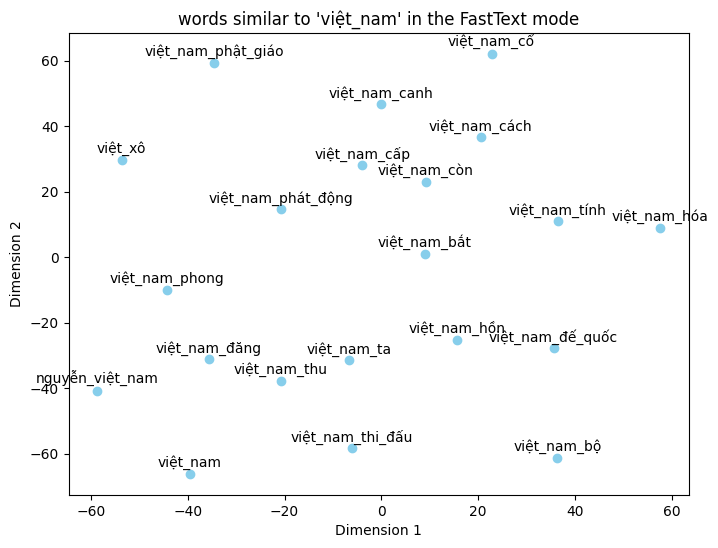

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_fasttext(model, keyword, topn=10):
    """
    Vẽ cụm các từ gần với 'keyword' trong không gian vector 2D (TSNE)
    """
    # Lấy danh sách từ tương tự
    similar_words = model.wv.most_similar(keyword, topn=topn)

    # Danh sách từ và vector tương ứng
    labels = [keyword] + [word for word, _ in similar_words]
    vectors = np.array([model.wv[word] for word in labels])

    # Giảm chiều về 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
    reduced = tsne.fit_transform(vectors)

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], color='skyblue')

    for i, label in enumerate(labels):
        plt.annotate(label, xy=(reduced[i, 0], reduced[i, 1]),
                     textcoords='offset points', xytext=(0, 5), ha='center')

    plt.title(f"words similar to 'việt_nam' in the FastText mode")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


# 🔹 Ví dụ demo:
visualize_fasttext(model_fasttext, "việt_nam", topn=20)


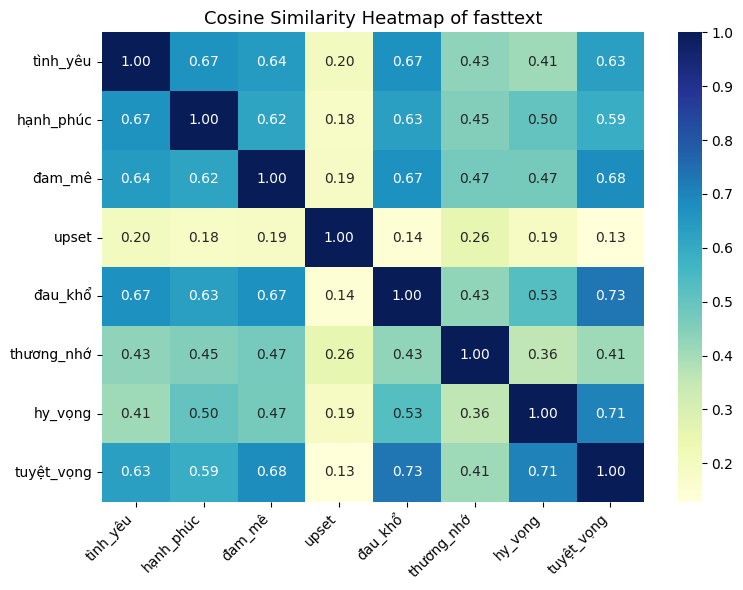

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_similarity_heatmap(model, words):
    """
    Vẽ heatmap biểu diễn độ tương đồng cosine giữa các từ trong danh sách.
    """
    # Nếu model là FastText, lấy phần wv
    if hasattr(model, 'wv'):
        model = model.wv

    # Tạo ma trận trống
    sim_matrix = np.zeros((len(words), len(words)))

    # Tính độ tương đồng cosine giữa từng cặp từ
    for i, w1 in enumerate(words):
        for j, w2 in enumerate(words):
            try:
                sim_matrix[i][j] = model.similarity(w1, w2)
            except KeyError:
                sim_matrix[i][j] = np.nan  # Nếu từ không có trong vocab

    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(sim_matrix, annot=True, cmap="YlGnBu",
                xticklabels=words, yticklabels=words, fmt=".2f")
    plt.title("Cosine Similarity Heatmap of fasttext", fontsize=13)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# 🔹 Ví dụ demo với nhóm từ cảm xúc
emotion_words = ["tình_yêu", "hạnh_phúc", "đam_mê", "upset",
                 "đau_khổ", "thương_nhớ", "hy_vọng", "tuyệt_vọng"]

plot_similarity_heatmap(model_fasttext, emotion_words)
